# Copy-Move forgery detection using PatchMatch

## Laïus d'intro sur patchmatch

 - NISSIM: Peut être commencer par une description plus haut niveau de la forgery detection: modification de type patch copié/collé souvent utilisée pour dissimuler qqchose dans une image (ex. staline), différentes robustesses de l'algo patch/match (rotation,.. mais pas scaling -> lien avec ma partie) 
 - principe général (trouver des bons matchs de manière random puis les propager aux voisins en partant de l'hypothèse que le champ de transformation est uniforme localement)
 - en quoi ça se démarque : plus rapide surtout et adaptable à tous les features de la littérature
 - robustesse limitée aux transformations usuelles --> bien choisir le feature mais marche pass très bien pck on se place dans un espace de dim supérieure et on a donc plus de mal à converger --> bloqué dans minimum local

## Results reproduction

We sought to reproduce the results of the patchmatch method and to assess its robustness against several transformations.

As for the patchmatch implementation, we adapted the author's matlab implementation available on http://www.grip.unina.it/research/83-multimedia_forensics/90-copy-move-forgery.html. The dataset used in the paper for experimenting on rigid translations is also available on this same link.

To evaluate the robustness of patchmatch against different degradations, we implemented a code to create forged images where the forgery has undergone a given transformation for a given parameter.

**Explain the methods actually implemented and how they are different from the one in the paper**

In [1]:
## mettre le code de création du dataset ou un lien vers le code sur github

In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [11]:
fscores_translation = pickle.load(open('fscores/translation','rb'))
fscores_noise = pickle.load(open('fscores/noise_cleaned','rb'))
fscores_rotate = pickle.load(open('fscores/rotate_tot','rb'))
fscores_scale = pickle.load(open('fscores/scale_cleaned','rb'))
fscores_jpeg = pickle.load(open('fscores/jpeg_cleaned','rb'))

fscores_mean_translation = np.mean(fscores_translation, axis=1)
fscores_mean_noise = np.mean(fscores_noise, axis=2)
fscores_mean_rotate = np.mean(fscores_rotate, axis=2)
fscores_mean_scale = np.mean(fscores_scale, axis=2)
fscores_mean_jpeg = np.mean(fscores_jpeg, axis=2)

In [15]:
noise_values = [.02, .04, .06, .08, .1]
angle_values = [4, 10, 20, 30, 60, 75, 90, 105, 130, 145, 160, 175, 180]
scale_values = [.5, .8, .91, 1.05, 1.09, 1.2, 2]
jpeg_values = [90, 80, 70, 60, 50, 40, 30, 20]

colors = ['green','pink','blue','red','orange']
methods = ['ZM-cart', 'ZM-polar', 'PCT-cart', 'PCT-polar', 'FMT']

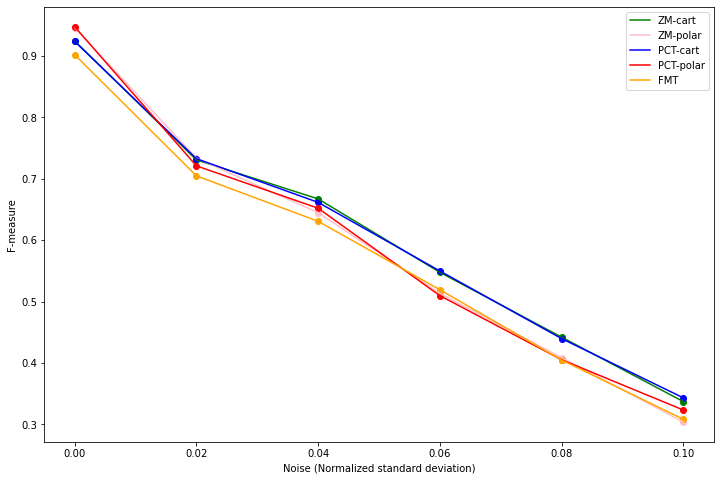

In [13]:
plt.figure(figsize=(12,8))
for j in range(5):
    plt.plot(
        [0]+noise_values,
        np.concatenate(([fscores_mean_translation[j]],fscores_mean_noise[:,j]),0),
        color=colors[j],
        label=methods[j]
    )
    plt.scatter(
        [0]+noise_values,
        np.concatenate(([fscores_mean_translation[j]],fscores_mean_noise[:,j]),0),
        color=colors[j],
    )
plt.legend()
plt.xlabel('Noise (Normalized standard deviation)')
plt.ylabel('F-measure')
plt.show()

In [ ]:
# commentaire sur la courbe et ajouter courbe du papier et comparer

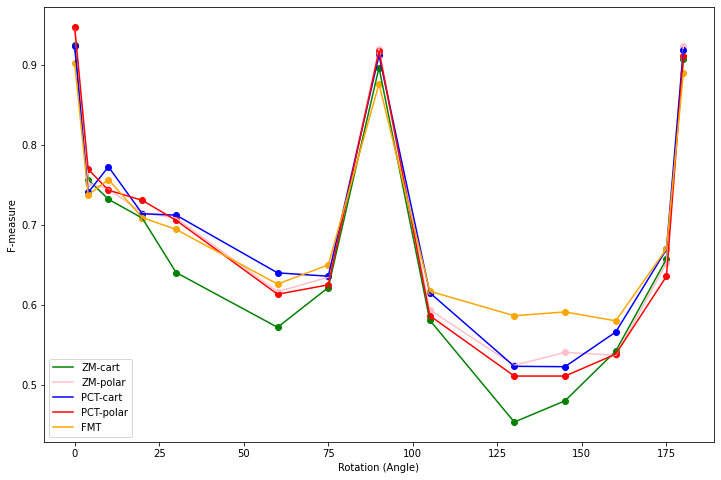

In [16]:
plt.figure(figsize=(12,8))
for j in range(5):
    plt.plot(
        [0]+angle_values,
        np.concatenate(([fscores_mean_translation[j]],fscores_mean_rotate[:,j]),0),
        color=colors[j],
        label=methods[j]
    )
    plt.scatter(
        [0]+angle_values,
        np.concatenate(([fscores_mean_translation[j]],fscores_mean_rotate[:,j]),0),
        color=colors[j],
    )
plt.legend()
plt.xlabel('Rotation (Angle)')
plt.ylabel('F-measure')
plt.show()

In [ ]:
# commentaire sur la courbe et ajouter courbe du papier et comparer

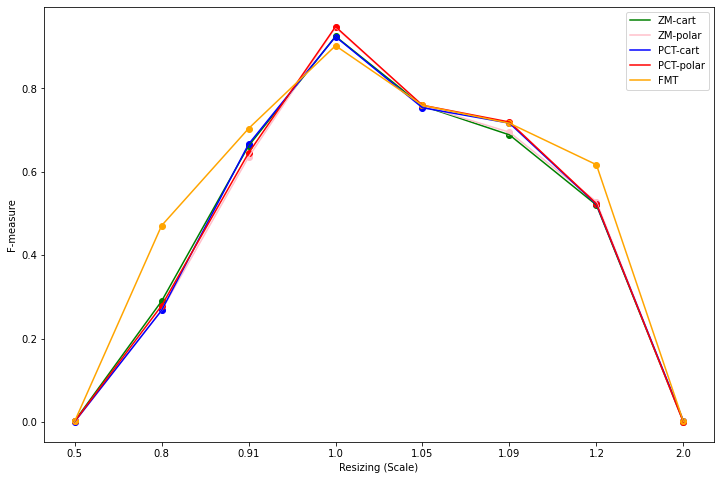

In [17]:
plt.figure(figsize=(12,8))
for j in range(5):
    plt.plot(
        np.array(scale_values[:3]+[1.0]+scale_values[3:]).astype(str),
        np.concatenate((fscores_mean_scale[:3,j],[fscores_mean_translation[j]],fscores_mean_scale[3:,j]),0),
        color=colors[j],
        label=methods[j]
    )
    plt.scatter(
        np.array(scale_values[:3]+[1.0]+scale_values[3:]).astype(str),
        np.concatenate((fscores_mean_scale[:3,j],[fscores_mean_translation[j]],fscores_mean_scale[3:,j]),0),
        color=colors[j],
    )
plt.legend()
plt.xlabel('Resizing (Scale)')
plt.ylabel('F-measure')
plt.show()

In [ ]:
# commentaire sur la courbe et ajouter courbe du papier et comparer

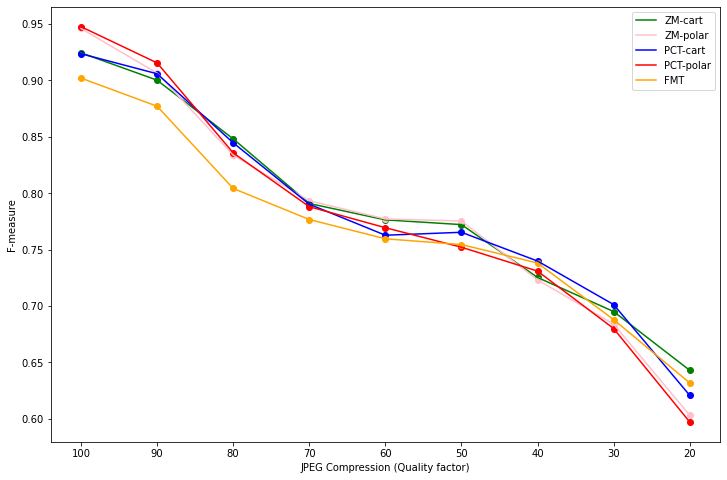

In [16]:
plt.figure(figsize=(12,8))
for j in range(5):
    plt.plot(
        np.array([100]+jpeg_values).astype(str),
        np.concatenate(([fscores_mean_translation[j]],fscores_mean_jpeg[:,j]),0),
        color=colors[j],
        label=methods[j]
    )
    plt.scatter(
        np.array([100]+jpeg_values).astype(str),
        np.concatenate(([fscores_mean_translation[j]],fscores_mean_jpeg[:,j]),0),
        color=colors[j],
    )
plt.legend()
plt.xlabel('JPEG Compression (Quality factor)')
plt.ylabel('F-measure')
plt.show()

In [ ]:
# commentaire sur la courbe et ajouter courbe du papier et comparer

On the whole, we observe that the performances of patchmatch drop quickly against the different transformations above.

We propose a complementary method to detect forgery for large parameters degradations. This approach comes at very low cost and can be used to detect forgeries using parts from other images.

## Partie Nissim